In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset

print(tf.__version__)

2.13.0


In [20]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = ["BasicMotions", "NATOPS", "UWaveGestureLibrary"]
methods = {
    # Basic experimentos
    # "43b17a2e4f21097540adf8600402c5bd32fa60d6": "subspace_gknn_gch",
    # "37a3f06c077321b95960769282152427a7ee48ae": "subspace_gknn_ich", 
    # "86df14d56b66fecfb65d5805107dfe10961ecae9": "subspace_iknn_gch",     
    # "4f40e39bfe0d3da692b5571d87f7ec915c42eba2": "subspace_iknn_ich", 
    
    # Basic experiments only gknn but with lower gamma (0.125)
    # "4d1faa458bab2b8c6ee14d59b824557fcc80d8e3": "subspace_gknn_gch_gamma0125", 
    # "93c0b5f0630a5dbf5d0377a4f3ff03b6868cbda1": "subspace_iknn_gch_gamma0125", 
    
    # Basic experiments New IoS 
    # "e54dcb25b02132166a719885cad2695540450ee6": "subspace_gknn_gch_ios",
    # "9cdb2fb25d7c664d60da7aa23b4c2c0f9ec9548c": "subspace_gknn_ich_ios",
    # "8c29354f168b9852a05523a7c26ab0f4acb30e9b": "subspace_iknn_gch_ios",
    # "b93fe63854fe36f62900cbcae1c00ad499d41f74": "subspace_iknn_ich_ios",
    
    # Sub-SpaCE v2 para fine tuning con optimizacion con canales independientes
    # "316686353c28547589d494bcc886c8334329b14e": "subspace_gknn_gch",
    # "0f31693cb3d17afd3d67191e82e2bca887075ee6": "subspace_gknn_gch_moremut",
    # "76f8a8271b7ba6d171b7383bce7bbf4d9286d78c": "subspace_gknn_gch_moreit",
    # "bba03e82f6c718e1466a06087dd99606de229b40": "subspace_gknn_ich",
    # "a246def090b506ff8ba41e861e0464493233b9d1": "subspace_gknn_ich_moremut",
    # "d3b12b6ac5e2ab4e68901859273a55edb14d5590": "subspace_gknn_ich_moreit",
    # "cfbb6793595875fa49b7becafefa2ff2df33a2f6": "subspace_gknn_cch",
    # "e4a8da55a30853287350d3540873bcb91cb50b70": "subspace_gknn_cch_moremut",
    # "fe0be96f08c5d37950f7ae2c50d7f81fc050c185": "subspace_gknn_cch_moreit",
    
    # Sub-SpaCE v2 con NUN sinteticos
    "0f31693cb3d17afd3d67191e82e2bca887075ee6": "subspace_gknn_gch_moremut",
    "988e9ee7e36478e6b02628f6fd15e8f6fdabce63": "subspace_iknn_gch_moremut",
    "a246def090b506ff8ba41e861e0464493233b9d1": "subspace_gknn_ich_moremut",
    "de59140e133b8214d6fd39630d49420f41f2f395": "subspace_iknn_ich_moremut",
    "e4a8da55a30853287350d3540873bcb91cb50b70": "subspace_gknn_cch_moremut",
    "af3bb75a4e9d84bc4cb545b21941e6750ce17b45": "subspace_iknn_cch_moremut",
}

# Get results

In [21]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculator, possible_nuns, desired_classes = load_dataset_for_eval(dataset)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculator
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods,
        data_tuple, original_classes, model, outlier_calculator, possible_nuns
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
0f31693cb3d17afd3d67191e82e2bca887075ee6


100%|██████████| 40/40 [00:01<00:00, 20.75it/s]


988e9ee7e36478e6b02628f6fd15e8f6fdabce63


100%|██████████| 40/40 [00:01<00:00, 20.99it/s]


a246def090b506ff8ba41e861e0464493233b9d1


100%|██████████| 40/40 [00:01<00:00, 20.86it/s]


af3bb75a4e9d84bc4cb545b21941e6750ce17b45


100%|██████████| 40/40 [00:02<00:00, 17.70it/s]


de59140e133b8214d6fd39630d49420f41f2f395


100%|██████████| 40/40 [00:01<00:00, 20.64it/s]


e4a8da55a30853287350d3540873bcb91cb50b70


100%|██████████| 40/40 [00:01<00:00, 21.00it/s]


Calculating metrics for NATOPS
0f31693cb3d17afd3d67191e82e2bca887075ee6


100%|██████████| 100/100 [00:05<00:00, 18.80it/s]


988e9ee7e36478e6b02628f6fd15e8f6fdabce63


100%|██████████| 100/100 [00:05<00:00, 19.40it/s]


a246def090b506ff8ba41e861e0464493233b9d1


100%|██████████| 100/100 [00:05<00:00, 19.70it/s]


af3bb75a4e9d84bc4cb545b21941e6750ce17b45


100%|██████████| 100/100 [00:05<00:00, 19.75it/s]


de59140e133b8214d6fd39630d49420f41f2f395


100%|██████████| 100/100 [00:04<00:00, 20.27it/s]


e4a8da55a30853287350d3540873bcb91cb50b70


100%|██████████| 100/100 [00:04<00:00, 20.02it/s]


Calculating metrics for UWaveGestureLibrary
0f31693cb3d17afd3d67191e82e2bca887075ee6


100%|██████████| 100/100 [00:05<00:00, 19.71it/s]


988e9ee7e36478e6b02628f6fd15e8f6fdabce63


100%|██████████| 100/100 [00:04<00:00, 20.18it/s]


a246def090b506ff8ba41e861e0464493233b9d1


100%|██████████| 100/100 [00:05<00:00, 19.48it/s]


af3bb75a4e9d84bc4cb545b21941e6750ce17b45


100%|██████████| 100/100 [00:05<00:00, 19.91it/s]


de59140e133b8214d6fd39630d49420f41f2f395


100%|██████████| 100/100 [00:05<00:00, 19.74it/s]


e4a8da55a30853287350d3540873bcb91cb50b70


100%|██████████| 100/100 [00:04<00:00, 20.32it/s]


In [22]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch_moremut,19.5 ± 11.69,270.15 ± 124.87,0.45 ± 0.21,856.04 ± 753.29,71.19 ± 50.95,0.73 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.17,0.01 ± 0.02,10.65 ± 4.61,0.04 ± 0.02,24.67 ± 6.32
1,subspace_iknn_gch_moremut,19.5 ± 11.69,287.6 ± 128.05,0.48 ± 0.21,922.83 ± 844.39,73.14 ± 54.1,0.71 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.24 ± 0.16,0.01 ± 0.02,10.88 ± 7.57,0.04 ± 0.03,32.69 ± 9.08
2,subspace_gknn_ich_moremut,19.5 ± 11.69,296.1 ± 131.98,0.49 ± 0.22,989.3 ± 860.02,76.85 ± 54.61,0.81 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.16,0.02 ± 0.03,18.35 ± 6.41,0.06 ± 0.02,27.15 ± 7.27
3,subspace_iknn_cch_moremut,19.5 ± 11.69,280.08 ± 125.68,0.47 ± 0.21,904.86 ± 815.0,72.87 ± 53.0,0.75 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.25 ± 0.16,0.01 ± 0.02,11.28 ± 7.06,0.04 ± 0.02,32.68 ± 8.93
4,subspace_iknn_ich_moremut,19.5 ± 11.69,297.48 ± 136.12,0.5 ± 0.23,955.98 ± 846.56,74.52 ± 53.14,0.79 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.17,0.02 ± 0.03,18.95 ± 6.48,0.06 ± 0.02,35.71 ± 10.28
5,subspace_gknn_cch_moremut,19.5 ± 11.69,264.35 ± 123.72,0.44 ± 0.21,851.66 ± 726.55,71.28 ± 50.22,0.77 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.17,0.01 ± 0.02,10.95 ± 4.65,0.04 ± 0.02,25.21 ± 5.84


NATOPS


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch_moremut,87.18 ± 53.72,326.88 ± 156.91,0.27 ± 0.13,161.85 ± 133.92,10.63 ± 6.9,0.9 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.03 ± 0.05,24.48 ± 3.38,0.04 ± 0.01,26.62 ± 5.3
1,subspace_iknn_gch_moremut,87.18 ± 53.72,384.25 ± 198.05,0.31 ± 0.16,139.62 ± 124.21,8.87 ± 6.03,0.78 ± 0.15,1.0 ± 0.0,0.8 ± 0.4,0.64 ± 0.24,0.06 ± 0.09,26.4 ± 8.7,0.04 ± 0.01,38.95 ± 13.78
2,subspace_gknn_ich_moremut,87.18 ± 53.72,359.36 ± 184.2,0.29 ± 0.15,166.2 ± 139.03,10.62 ± 6.83,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.64 ± 0.21,0.06 ± 0.07,44.37 ± 11.85,0.07 ± 0.02,31.8 ± 8.63
3,subspace_iknn_cch_moremut,87.18 ± 53.72,385.02 ± 198.53,0.31 ± 0.16,140.78 ± 123.44,8.97 ± 6.0,0.89 ± 0.09,1.0 ± 0.0,0.8 ± 0.4,0.64 ± 0.24,0.06 ± 0.09,25.64 ± 4.93,0.04 ± 0.01,40.2 ± 14.54
4,subspace_iknn_ich_moremut,87.18 ± 53.72,430.41 ± 224.78,0.35 ± 0.18,142.42 ± 122.72,8.85 ± 5.83,0.9 ± 0.07,1.0 ± 0.0,0.8 ± 0.4,0.68 ± 0.27,0.09 ± 0.11,52.32 ± 22.35,0.09 ± 0.04,44.64 ± 15.56
5,subspace_gknn_cch_moremut,87.18 ± 53.72,322.35 ± 155.95,0.26 ± 0.13,161.01 ± 131.49,10.68 ± 6.79,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,24.13 ± 4.48,0.04 ± 0.01,28.4 ± 5.91


UWaveGestureLibrary


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch_moremut,159.0 ± 87.23,311.19 ± 126.64,0.33 ± 0.13,281.16 ± 120.23,19.17 ± 5.08,0.87 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.16,0.04 ± 0.06,7.11 ± 2.82,0.02 ± 0.01,49.73 ± 12.56
1,subspace_iknn_gch_moremut,159.0 ± 87.23,376.56 ± 169.79,0.4 ± 0.18,290.55 ± 130.75,18.32 ± 5.69,0.79 ± 0.13,1.0 ± 0.0,0.81 ± 0.39,0.7 ± 0.16,0.04 ± 0.07,8.43 ± 3.43,0.02 ± 0.01,66.08 ± 19.73
2,subspace_gknn_ich_moremut,159.0 ± 87.23,314.72 ± 138.72,0.33 ± 0.15,289.74 ± 130.49,19.46 ± 5.33,0.9 ± 0.06,1.0 ± 0.0,1.0 ± 0.0,0.7 ± 0.16,0.05 ± 0.08,9.24 ± 4.93,0.02 ± 0.01,52.36 ± 12.77
3,subspace_iknn_cch_moremut,159.0 ± 87.23,379.26 ± 172.29,0.4 ± 0.18,293.61 ± 132.98,18.42 ± 5.65,0.8 ± 0.12,1.0 ± 0.0,0.81 ± 0.39,0.69 ± 0.15,0.04 ± 0.07,8.63 ± 3.52,0.02 ± 0.01,69.28 ± 21.14
4,subspace_iknn_ich_moremut,159.0 ± 87.23,401.96 ± 192.53,0.43 ± 0.2,309.69 ± 140.91,18.95 ± 5.59,0.84 ± 0.1,1.0 ± 0.0,0.81 ± 0.39,0.71 ± 0.15,0.06 ± 0.08,11.95 ± 6.26,0.03 ± 0.01,67.45 ± 20.68
5,subspace_gknn_cch_moremut,159.0 ± 87.23,314.31 ± 135.75,0.33 ± 0.14,287.94 ± 126.98,19.44 ± 5.27,0.89 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.15,0.03 ± 0.05,7.25 ± 2.81,0.02 ± 0.01,50.06 ± 11.37


In [23]:
columns = ["nchanges", "L2", "valid", "increase_outlier_score", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

BasicMotions


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch_moremut,264.35 ± 123.72,71.28 ± 50.22,1.0 ± 0.0,0.01 ± 0.02,10.95 ± 4.65,25.21 ± 5.84
subspace_gknn_gch_moremut,270.15 ± 124.87,71.19 ± 50.95,1.0 ± 0.0,0.01 ± 0.02,10.65 ± 4.61,24.67 ± 6.32
subspace_gknn_ich_moremut,296.1 ± 131.98,76.85 ± 54.61,1.0 ± 0.0,0.02 ± 0.03,18.35 ± 6.41,27.15 ± 7.27
subspace_iknn_cch_moremut,280.08 ± 125.68,72.87 ± 53.0,1.0 ± 0.0,0.01 ± 0.02,11.28 ± 7.06,32.68 ± 8.93
subspace_iknn_gch_moremut,287.6 ± 128.05,73.14 ± 54.1,1.0 ± 0.0,0.01 ± 0.02,10.88 ± 7.57,32.69 ± 9.08
subspace_iknn_ich_moremut,297.48 ± 136.12,74.52 ± 53.14,1.0 ± 0.0,0.02 ± 0.03,18.95 ± 6.48,35.71 ± 10.28


NATOPS


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch_moremut,322.35 ± 155.95,10.68 ± 6.79,1.0 ± 0.0,0.02 ± 0.04,24.13 ± 4.48,28.4 ± 5.91
subspace_gknn_gch_moremut,326.88 ± 156.91,10.63 ± 6.9,1.0 ± 0.0,0.03 ± 0.05,24.48 ± 3.38,26.62 ± 5.3
subspace_gknn_ich_moremut,359.36 ± 184.2,10.62 ± 6.83,1.0 ± 0.0,0.06 ± 0.07,44.37 ± 11.85,31.8 ± 8.63
subspace_iknn_cch_moremut,385.02 ± 198.53,8.97 ± 6.0,1.0 ± 0.0,0.06 ± 0.09,25.64 ± 4.93,40.2 ± 14.54
subspace_iknn_gch_moremut,384.25 ± 198.05,8.87 ± 6.03,1.0 ± 0.0,0.06 ± 0.09,26.4 ± 8.7,38.95 ± 13.78
subspace_iknn_ich_moremut,430.41 ± 224.78,8.85 ± 5.83,1.0 ± 0.0,0.09 ± 0.11,52.32 ± 22.35,44.64 ± 15.56


UWaveGestureLibrary


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch_moremut,314.31 ± 135.75,19.44 ± 5.27,1.0 ± 0.0,0.03 ± 0.05,7.25 ± 2.81,50.06 ± 11.37
subspace_gknn_gch_moremut,311.19 ± 126.64,19.17 ± 5.08,1.0 ± 0.0,0.04 ± 0.06,7.11 ± 2.82,49.73 ± 12.56
subspace_gknn_ich_moremut,314.72 ± 138.72,19.46 ± 5.33,1.0 ± 0.0,0.05 ± 0.08,9.24 ± 4.93,52.36 ± 12.77
subspace_iknn_cch_moremut,379.26 ± 172.29,18.42 ± 5.65,1.0 ± 0.0,0.04 ± 0.07,8.63 ± 3.52,69.28 ± 21.14
subspace_iknn_gch_moremut,376.56 ± 169.79,18.32 ± 5.69,1.0 ± 0.0,0.04 ± 0.07,8.43 ± 3.43,66.08 ± 19.73
subspace_iknn_ich_moremut,401.96 ± 192.53,18.95 ± 5.59,1.0 ± 0.0,0.06 ± 0.08,11.95 ± 6.26,67.45 ± 20.68


# Counterfactual visualization

In [24]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12))
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.1, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            # Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')
            found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['NUN', 'x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.show()



In [25]:
dataset = "UWaveGestureLibrary"
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
common_index_instance = 14

Sample 54: true class [1], x_orig predicted 1, desired_class  6


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_5304\2187854086.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


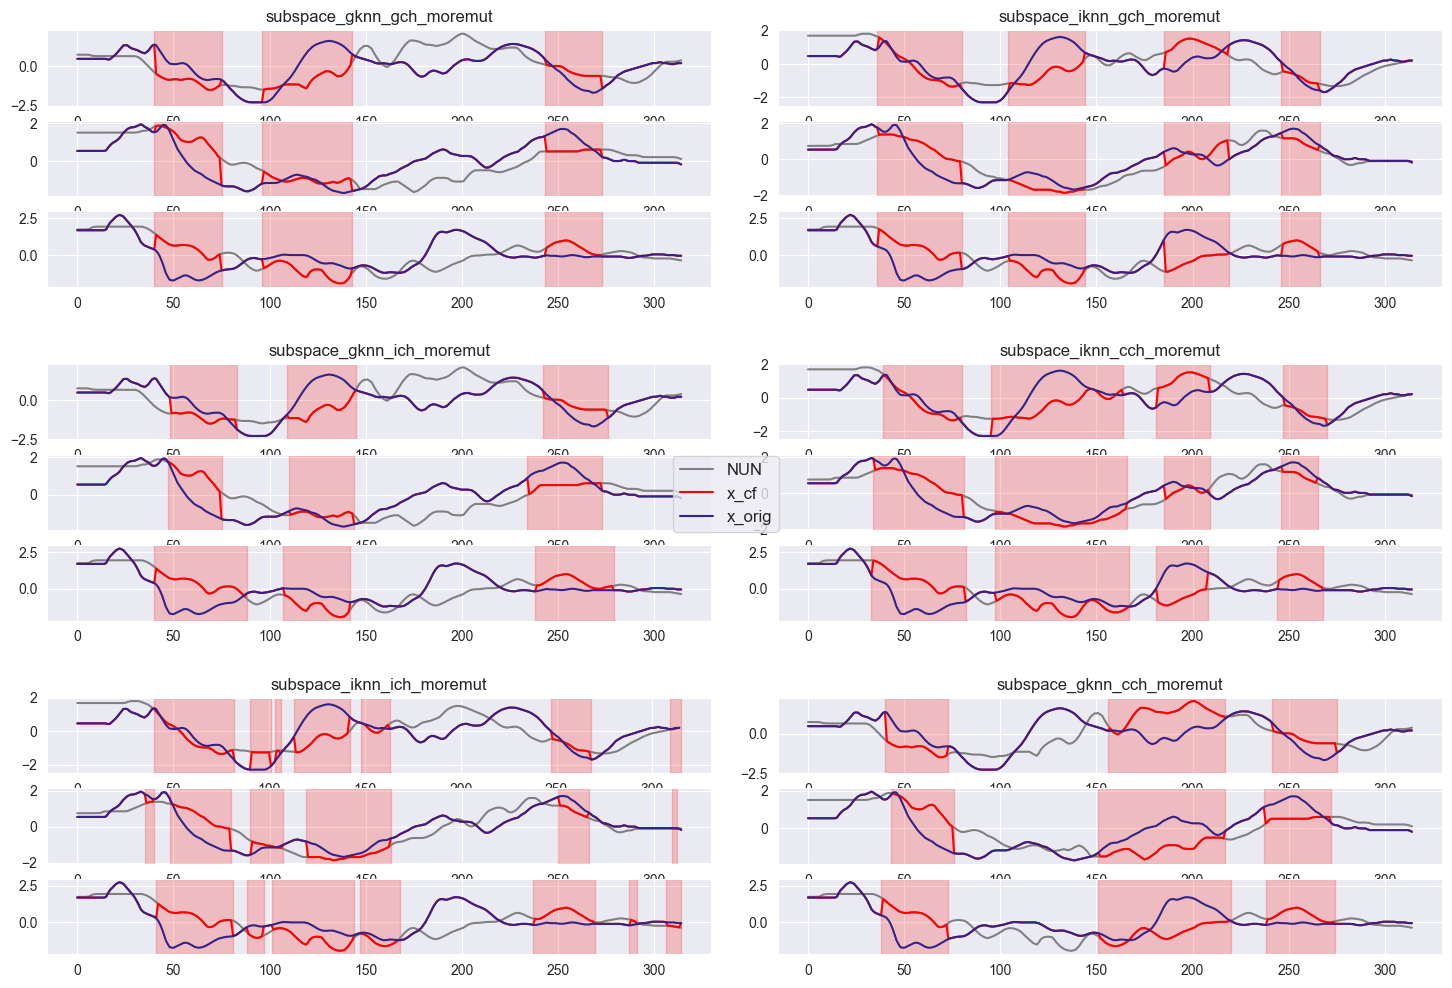

In [26]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = methods_cfs_dict[dataset]
sol_cfs_methods = {method: sol_cfs[common_index_instance]['cf'] for method, sol_cfs in sol_cfs_methods.items()}

# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
